## Import Libraries

In [1560]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from termcolor import colored
import matplotlib.patches as patches
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import Conv1D, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
#git test from macbook 3

## Load Data

In [1561]:
data = pd.read_csv('train.csv')
data_nn = data.copy()
data.head(20)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,9.7,0.690,0.32,2.5,0.088,22.0,91.0,0.99790,3.29,0.62,10.1,5
1,6.6,0.580,0.02,2.4,0.069,19.0,40.0,0.99387,3.38,0.66,12.6,6
2,9.2,0.755,0.18,2.2,0.148,10.0,103.0,0.99690,2.87,1.36,10.2,6
3,9.0,0.785,0.24,1.7,0.078,10.0,21.0,0.99692,3.29,0.67,10.0,5
4,10.6,0.360,0.57,2.3,0.087,6.0,20.0,0.99676,3.14,0.72,11.1,7
5,12.0,0.450,0.55,2.0,0.073,25.0,49.0,0.99970,3.10,0.76,10.3,6
6,6.0,0.500,0.00,1.4,0.057,15.0,26.0,0.99448,3.36,0.45,9.5,5
7,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
8,7.8,0.560,0.19,2.0,0.081,17.0,108.0,0.99620,3.32,0.54,9.5,5
9,6.6,0.500,0.01,1.5,0.060,17.0,26.0,0.99520,3.40,0.58,9.8,6


In [1562]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1000 non-null   float64
 1   volatile.acidity      1000 non-null   float64
 2   citric.acid           1000 non-null   float64
 3   residual.sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free.sulfur.dioxide   1000 non-null   float64
 6   total.sulfur.dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  quality               1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


In [1563]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed.acidity,1000.0,8.301300,1.713092,4.70000,7.100000,7.90000,9.200000,15.9000
volatile.acidity,1000.0,0.523645,0.172574,0.12000,0.395000,0.51000,0.630000,1.5800
citric.acid,1000.0,0.268310,0.194616,0.00000,0.090000,0.25000,0.420000,1.0000
residual.sugar,1000.0,2.552300,1.429940,0.90000,1.900000,2.20000,2.600000,15.5000
chlorides,1000.0,0.087091,0.048161,0.01200,0.070000,0.07900,0.090000,0.6110
free.sulfur.dioxide,1000.0,15.862500,10.255048,1.00000,8.000000,14.00000,21.000000,72.0000
total.sulfur.dioxide,1000.0,46.255500,32.748579,6.00000,23.000000,38.00000,60.000000,289.0000
density,1000.0,0.996713,0.001880,0.99007,0.995567,0.99673,0.997833,1.0032
pH,1000.0,3.306920,0.151222,2.74000,3.210000,3.31000,3.400000,4.0100
sulphates,1000.0,0.654180,0.168285,0.33000,0.550000,0.62000,0.720000,2.0000


## Data Cleaning

### Missing values

In [1564]:
missing_values_count = data.isnull().sum()
print(missing_values_count)

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [1565]:
total_cells = np.product(data.shape)
total_missing = data.isnull().sum().sum()
print((total_missing / total_cells) * 100)

0.0


In [1566]:

total_cells = np.product(data.shape)
total_missing = data.isnull().sum().sum()
print((total_missing / total_cells) * 100)

0.0


### Distribution of data

In [1567]:
# sns.pairplot(data, hue='quality', corner = True, palette='Purples')

### PCA

(1000, 12)


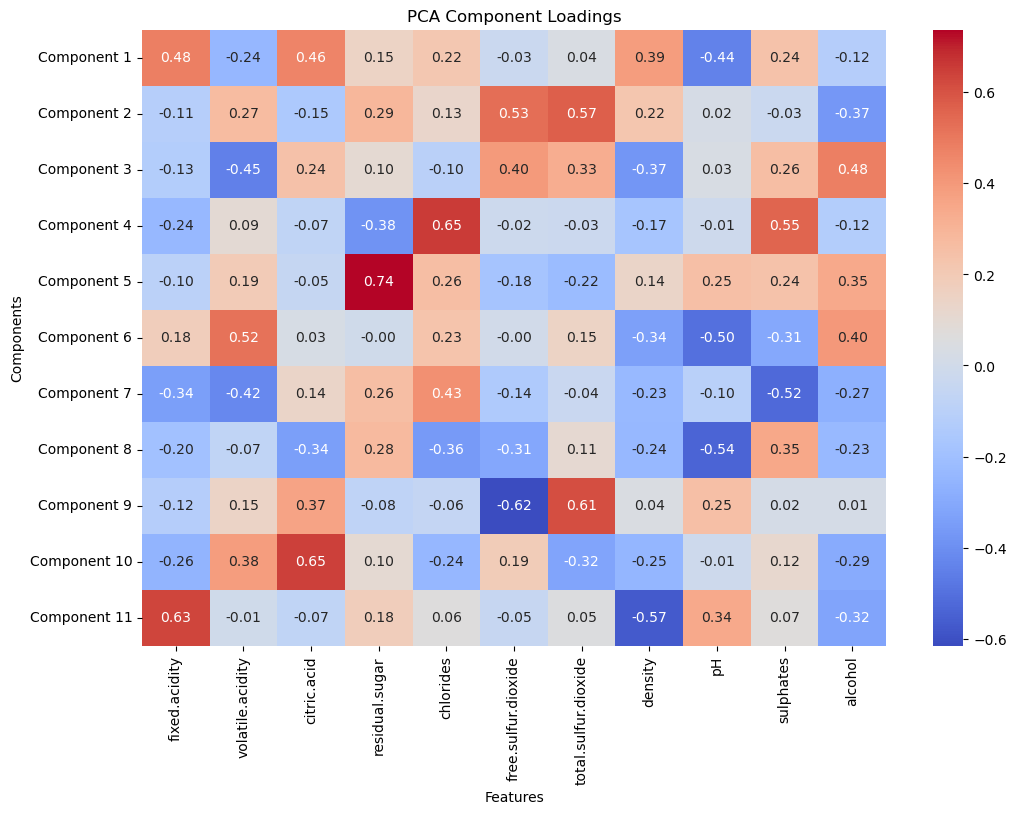

Number of components to explain 98.0% of variance: 10
(1000, 10)
          pH  residual.sugar   density  free.sulfur.dioxide  \
0   0.597852        1.464666 -0.224425            -0.327211   
1  -2.308777       -0.717975  1.330243             0.175993   
2   2.388331        1.052932  0.280970             3.297763   
3  -0.218856       -0.389610 -1.495859             0.276599   
4   2.086119       -1.930214  0.338243            -0.266295   
5   3.063592        0.129108  0.116233            -0.616065   
6  -2.337547       -0.286059 -0.632767            -0.038575   
7  -2.771193       -0.339644  0.918450             0.086433   
8  -0.600601        1.433373 -0.001252            -0.089622   
9  -1.943711       -0.239119 -0.385533             0.208002   
10  0.138458        0.511854 -1.705432            -0.415210   
11 -1.525589        0.253971 -0.578830             0.457732   
12 -1.339589        0.089399 -0.299974            -1.160801   
13 -0.072486       -0.819291 -1.128202            -0.

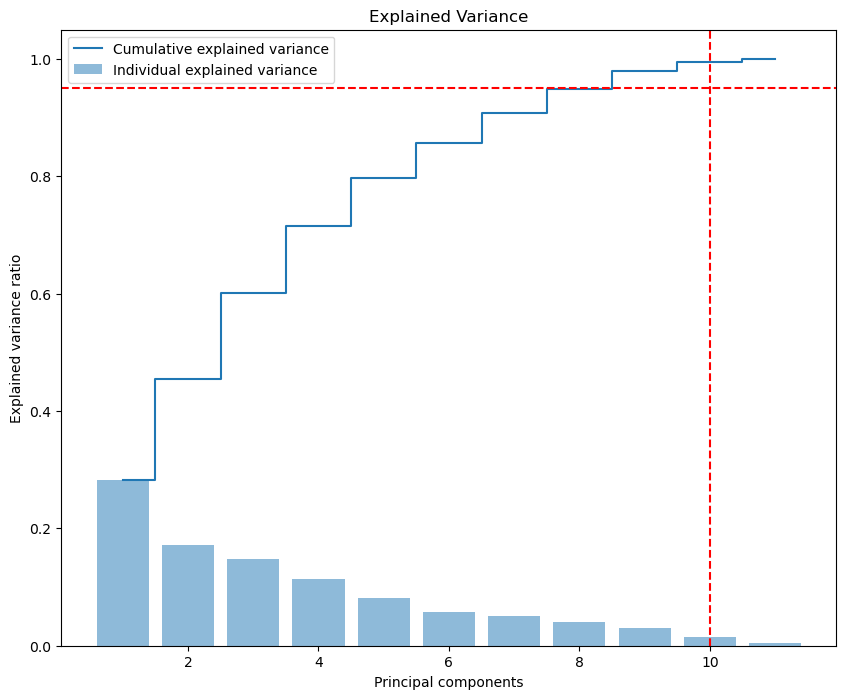

In [1568]:
print(data.shape)
features = [col for col in data.columns if col != 'quality']

# 1. 标准化数据
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# 2. 应用 PCA，不限制主成分的数目
pca = PCA()
principal_components = pca.fit_transform(data_scaled)

para = 0.98
# 3. 特征加载矩阵的热图
loadings = pca.components_
loading_matrix = pd.DataFrame(loadings, columns=features, index=[f"Component {i+1}" for i in range(loadings.shape[0])])

# 4. 使用 seaborn 绘制热图
plt.figure(figsize=(12, 8))
sns.heatmap(loading_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title('PCA Component Loadings')
plt.xlabel('Features')
plt.ylabel('Components')
plt.show()

# 4. 计算累计方差解释比例
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# 5. 确定覆盖至少95%总方差的主成分数
n_components = np.where(cumulative_variance >= para)[0][0] + 1
print(f"Number of components to explain {para * 100}% of variance: {n_components}")

# 6. 可视化方差解释比例和累计方差解释比例
plt.figure(figsize=(10, 8))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=n_components, color='r', linestyle='--')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.title('Explained Variance')
plt.legend(loc='best')
plt.savefig('pca.pdf')

# 重新进行PCA，只保留前n_components个主成分
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(data_scaled)

# 计算每个特征对每个主成分的贡献度绝对值总和
feature_contributions = np.abs(loadings[:n_components]).sum(axis=0)

# 找出贡献度最高的特征
important_features_indices = np.argsort(feature_contributions)[-n_components:]
important_features = [features[i] for i in important_features_indices]

# 将主成分得分与原始的 'quality' 列合并，并使用重要特征的名称
pca_data = pd.DataFrame(data=principal_components, columns=important_features)
print(pca_data.shape)
pca_data['quality'] = data['quality']  # 添加 'quality' 列

# 显示新的数据集
print(pca_data.head(20))  # 显示前几行以检查数据
data = pca_data
print(data.shape)

# 记录被删除的特征
deleted_features = list(set(features) - set(important_features))
print(f"Deleted features: {deleted_features}")

print(data.head(20))
deleted_features = list(set(features) - set(important_features))
print(f"Deleted features: {deleted_features}")


### Clean outliers

volatile.acidity 删了 46 个点
residual.sugar 删了 35 个点
chlorides 删了 56 个点
free.sulfur.dioxide 删了 28 个点
total.sulfur.dioxide 删了 46 个点
density 删了 31 个点
pH 删了 31 个点
sulphates 删了 32 个点
alcohol 删了 30 个点
citric.acid 删了 27 个点
删点的总和: 362
Resampled dataset shape: quality
5    281
6    281
7    281
4    281
8    281
3    281
Name: count, dtype: int64
(638, 10)
(638,)


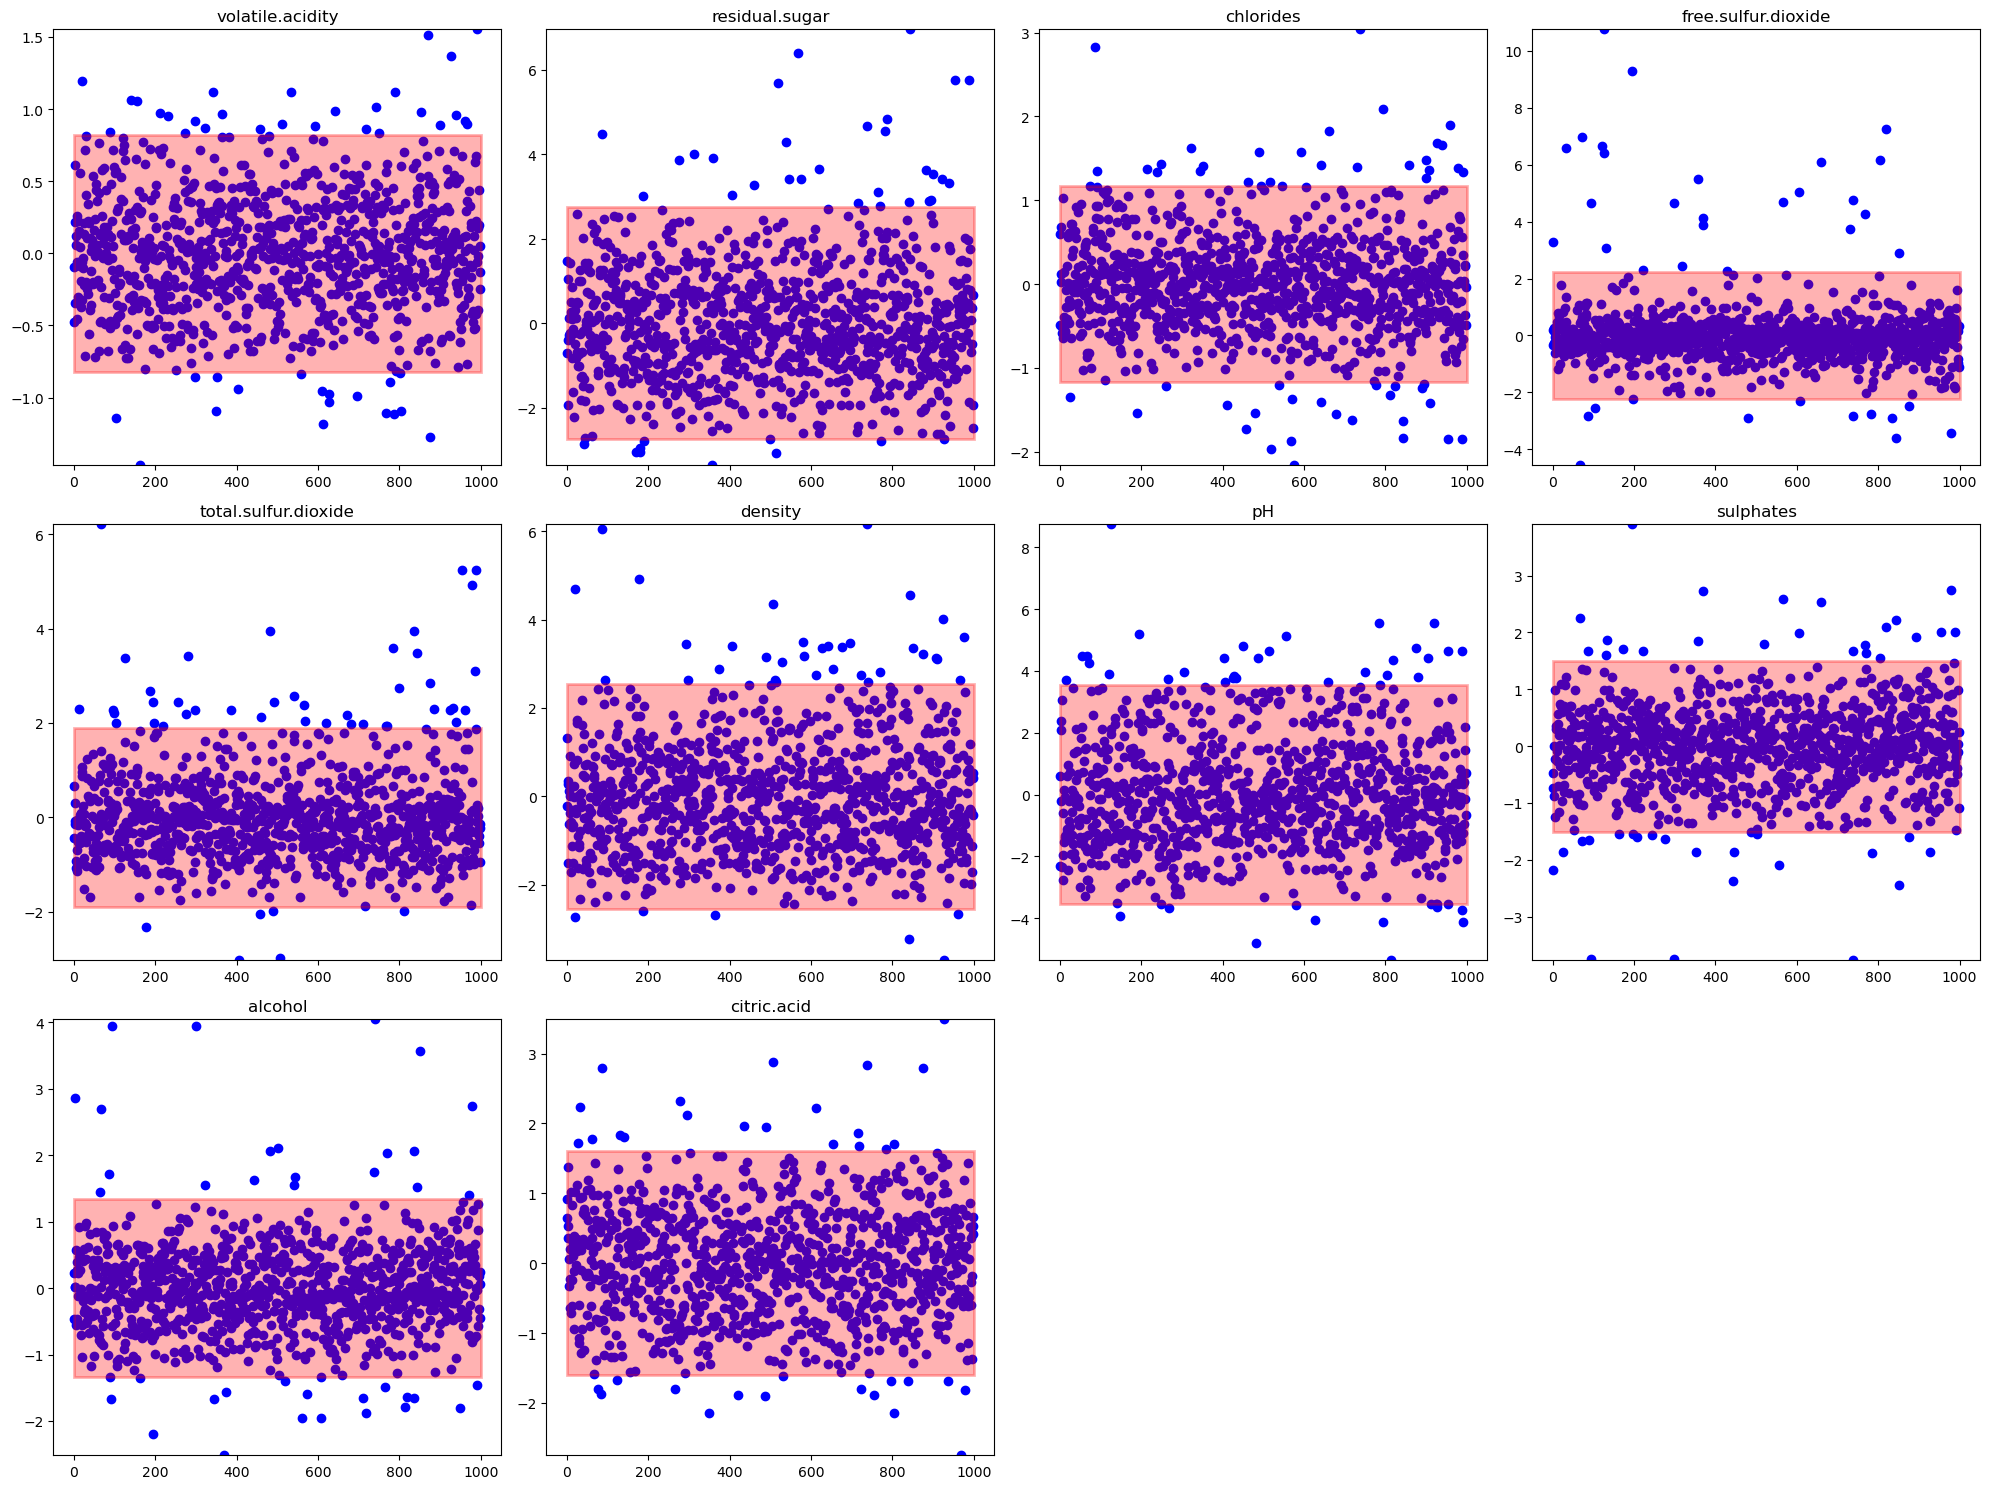

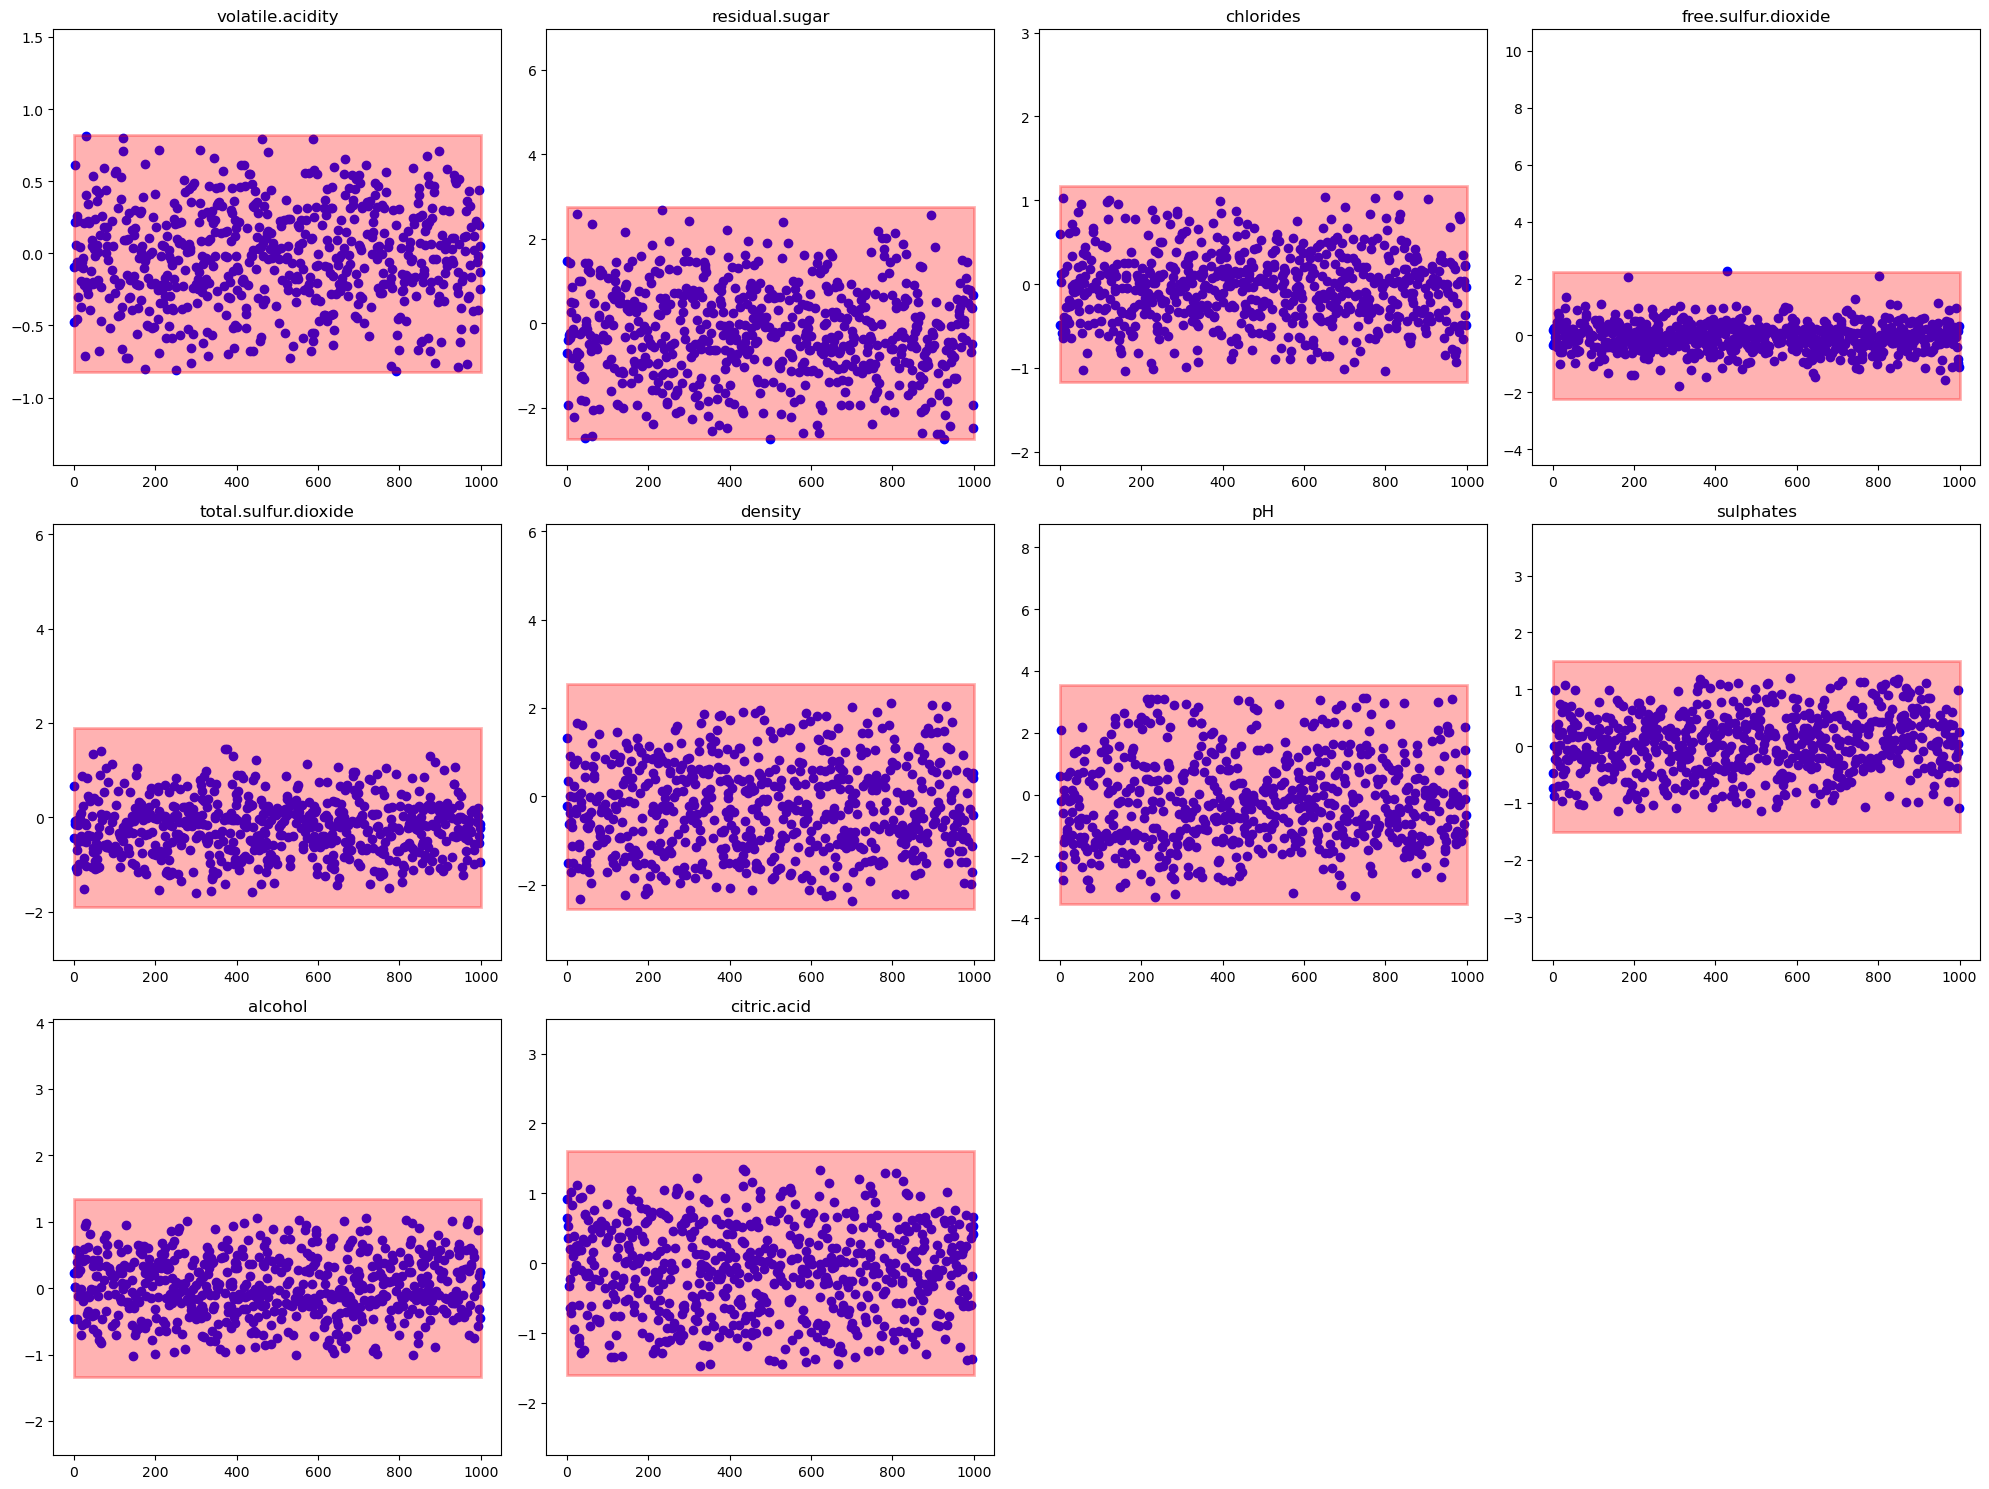

In [1569]:
columns = [
     'volatile.acidity', 'residual.sugar',
    'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
    'pH', 'sulphates', 'alcohol','citric.acid'
]
# columns = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8', 'Component 9']
# 复制原始数据用于保留纵坐标scale
original_data = data.copy()
removed_points = {}
# 去除每列中均值±2倍标准差之外的数据点s
for column in columns:
    mean = data[column].mean()
    std = data[column].std()
    initial_count = len(data)
    data = data[(data[column] >= mean - 2 * std) & (data[column] <= mean + 2* std)]
    final_count = len(data)
    removed_points[column] = initial_count - final_count


for column, count in removed_points.items():
    print(f"{column} 删了 {count} 个点")

# 删除点数的总和
total_removed_points = sum(removed_points.values())
print(f"删点的总和: {total_removed_points}")

# 获取每列的最大值和最小值，以便在重新绘图时设置相同的y轴scale
y_min_max = {column: (min(original_data[column].min(), data[column].min()), 
                      max(original_data[column].max(), data[column].max())) 
             for column in columns}

# 绘制初始数据的散点图并添加红色矩形
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns):
    plt.subplot(3, 4, i + 1)
    plt.scatter(original_data.index, original_data[column], color='blue')
    
    mean = original_data[column].mean()
    std = original_data[column].std()
    
    rect = patches.Rectangle((0, mean - 2*std), len(original_data), 4 * std, linewidth=2, edgecolor='red', facecolor='red', alpha=0.3)
    plt.gca().add_patch(rect)
    
    plt.ylim(y_min_max[column])  # 设置y轴范围
    plt.title(column)
    plt.tight_layout()

plt.savefig('1.pdf')

# 绘制去除异常值后的散点图
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns):
    plt.subplot(3, 4, i + 1)
    plt.scatter(data.index, data[column], color='blue')
    
    mean = original_data[column].mean()
    std = original_data[column].std()
    
    rect = patches.Rectangle((0, mean - 2*std), len(original_data), 4 * std, linewidth=2, edgecolor='red', facecolor='red', alpha=0.3)
    plt.gca().add_patch(rect)
    
    plt.ylim(y_min_max[column])  # 设置y轴范围
    plt.title(column)
    plt.tight_layout()

plt.savefig('2.pdf')


# 分离去除异常值后的特征和标签
X_cleaned = data.drop(['quality'], axis=1)
y_cleaned = data['quality']

# 检查并移除包含 NaN 的行
clean_mask = ~X_cleaned.isnull().any(axis=1) & ~y_cleaned.isnull()
X_cleaned = X_cleaned[clean_mask]
y_cleaned = y_cleaned[clean_mask]

# 对处理后的数据集应用SMOTE
os = SMOTE(k_neighbors=1, random_state=42)
X_res, y_res = os.fit_resample(X_cleaned, y_cleaned)

# print("Original dataset shape:", y.value_counts())
print("Resampled dataset shape:", y_res.value_counts())
print(X_cleaned.shape)
print(y_cleaned.shape)

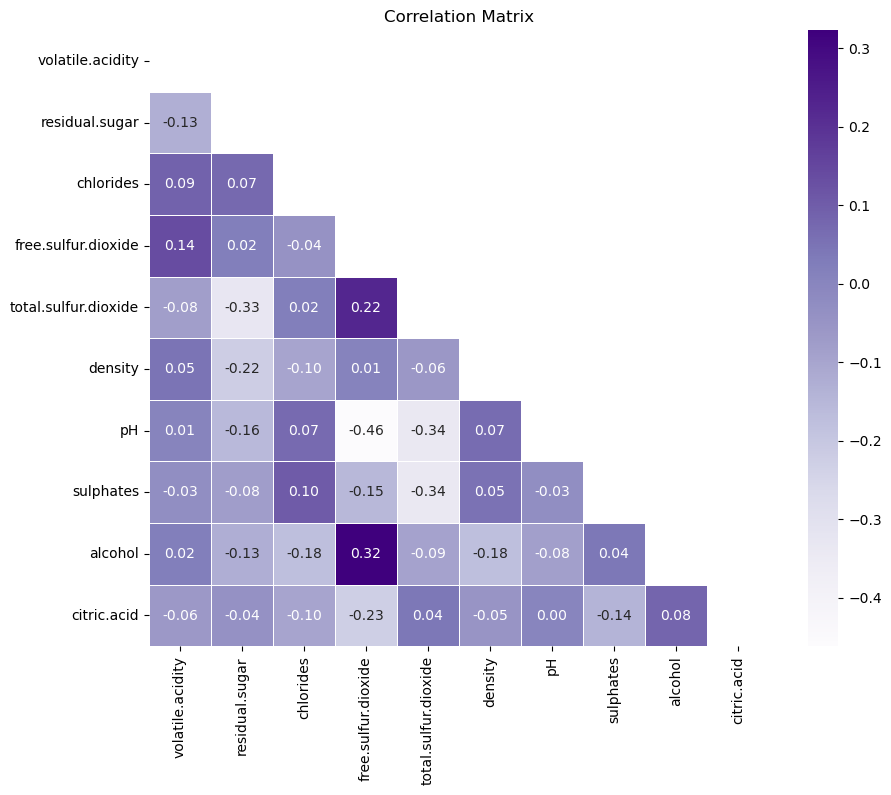

In [1570]:
corr_matrix = data[columns].corr()

# 使用 seaborn 绘制热图
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,  annot=True, fmt='.2f', linewidth=0.5, cmap='Purples', mask=np.triu(corr_matrix))
plt.title('Correlation Matrix')
plt.show()

In [1571]:
# sns.pairplot(data, hue='quality', corner = True, palette='Purples')

In [1572]:

x_res,y_res = os.fit_resample(X_cleaned,y_cleaned)
print(x_res.shape)
print(y_res.shape)

(1686, 10)
(1686,)


In [1573]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=0)

from sklearn.preprocessing import StandardScaler
stdscale = StandardScaler().fit(x_train)
x_train_std = stdscale.transform(x_train)
x_test_std = stdscale.transform(x_test)
print(x_train_std.shape)
print(x_test_std.shape)

(1348, 10)
(338, 10)


### Logistic Regression

In [1574]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_std,y_train)
predictions = lr.predict(x_test_std)
accuracy_score(y_test,predictions)

0.6745562130177515

In [1575]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# 假设 x_train_std, y_train, x_test_std, y_test 已经定义

# 训练逻辑回归模型
lr = LogisticRegression()
lr.fit(x_train_std, y_train)

# 使用 predict 方法进行类别预测
predicted_classes = lr.predict(x_test_std)

# 计算MSE
mse = mean_squared_error(y_test, predicted_classes)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.6183431952662722


In [1576]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import StandardScaler

# # Assume x_train_std, y_train, x_test_std, y_test are already defined

# # Standardize features
# scaler = StandardScaler()
# x_train_std = scaler.fit_transform(x_train_std)
# x_test_std = scaler.transform(x_test_std)

# # Train the standard Logistic Regression model
# lr = LogisticRegression()
# lr.fit(x_train_std, y_train)

# # Get predicted probabilities for the positive class
# probabilities = lr.predict_proba(x_test_std)[:, 1]

# # Evaluate using MSE
# mse_standard = mean_squared_error(y_test, probabilities)
# print(f'Mean Squared Error (using standard Logistic Regression): {mse_standard}')


### DecisionTree

In [1577]:
# from sklearn.tree import DecisionTreeClassifier
# dt = DecisionTreeClassifier()
# dt.fit(x_train_std,y_train)
# accuracy_score(y_test,dt.predict(x_test_std))

In [1578]:
# from sklearn.tree import DecisionTreeRegressor
# dt = DecisionTreeRegressor()
# dt.fit(x_train_std,y_train)
# accuracy_score(y_test,dt.predict(x_test_std))

In [1579]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# 初始化决策树回归器
dt = DecisionTreeRegressor()

# 训练决策树回归器
dt.fit(x_train_std, y_train)

# 使用训练好的模型对测试集进行预测
y_pred = dt.predict(x_test_std)

# 计算预测结果与实际标签之间的 MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")


MSE: 0.2514792899408284


### RandomForest

In [1580]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import mean_squared_error

# # 初始化随机森林分类器
# rf = RandomForestClassifier(random_state=42)
# print(x_train_std.shape)
# # 训练随机森林模型
# rf.fit(x_train_std, y_train)

# # 使用训练好的模型对训练集进行预测
# y_train_pred = rf.predict(x_train_std)

# # 使用训练好的模型对测试集进行预测（如果有测试集）
# y_test_pred = rf.predict(x_test_std)

# # 计算训练集的MSE
# train_mse = mean_squared_error(y_train, y_train_pred)
# print(f"Training MSE: {train_mse}")

# # 计算测试集的MSE（如果有测试集）
# test_mse = mean_squared_error(y_test, y_test_pred)
# print(f"Test MSE: {test_mse}")


In [1581]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 初始化随机森林回归器
rf_regressor = RandomForestRegressor(random_state=42)

# 训练随机森林回归器
rf_regressor.fit(x_train_std, y_train)

# 使用训练好的模型对训练集进行预测
y_train_pred = rf_regressor.predict(x_train_std)

# 使用训练好的模型对测试集进行预测
y_test_pred = rf_regressor.predict(x_test_std)

# 计算训练集的MSE
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Training MSE: {train_mse}")

# 计算测试集的MSE
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")
y_test_pred = rf_regressor.predict(x_test_std)

test_df = pd.read_csv('test.csv')

# 删除'fixed.acidity'这一列
test_df = test_df.drop(columns=['fixed.acidity'])

# 提取特征
X_test_final = test_df.drop(columns=['id']).values

# 标准化特征（假设已经有标准化器，如StandardScaler在训练集上已fit过）
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test_final_std = scaler.fit_transform(X_test_final)

# 使用训练好的模型对测试数据进行预测
predictions = rf_regressor.predict(X_test_final_std)

# 生成预测结果DataFrame
result_df = pd.DataFrame({'id': test_df['id'], 'quality': predictions})

# 保存结果到CSV文件
result_df.to_csv('predict_rfffff.csv', index=False)
print("预测结果已保存到 predict_rfffff.csv")


Training MSE: 0.01835066765578635
Test MSE: 0.1471233727810651
预测结果已保存到 predict_rfffff.csv


In [1582]:
##以下操作没有做任何处理：

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 读取训练数据
train_data = pd.read_csv('train.csv')

# 分离特征和标签
X_train = train_data.drop(columns=['quality'])
y_train = train_data['quality']

# 读取测试数据
test_data = pd.read_csv('test.csv')

# 提取测试数据的特征
X_test = test_data.drop(columns=['id'])

# 数据标准化
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 初始化随机森林回归器
rf = RandomForestRegressor(random_state=42)

# 训练随机森林模型
rf.fit(X_train_std, y_train)

# 使用训练好的模型对训练集进行预测
y_train_pred = rf.predict(X_train_std)

# 计算训练集的MSE
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Training MSE: {train_mse}")

# 使用训练好的模型对测试数据进行预测
y_test_pred = rf.predict(X_test_std)

# 生成预测结果DataFrame
result_df = pd.DataFrame({'id': test_data['id'], 'quality': y_test_pred})

# 保存结果到CSV文件
result_df.to_csv('predict_no_drop.csv', index=False)


Training MSE: 0.052526199999999995


In [1583]:
###pca降维
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

# 读取训练数据
train_data = pd.read_csv('train.csv')

# 分离特征和标签
X_train = train_data.drop(columns=['quality'])
y_train = train_data['quality']

# 读取测试数据
test_data = pd.read_csv('test.csv')

# 提取测试数据的特征
X_test = test_data.drop(columns=['id'])

# 数据标准化
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 使用PCA进行降维，保留10个主成分
pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# 初始化随机森林回归器
rf = RandomForestRegressor(random_state=42)

# 训练随机森林模型
rf.fit(X_train_pca, y_train)

# 使用训练好的模型对训练集进行预测
y_train_pred = rf.predict(X_train_pca)

# 计算训练集的MSE
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Training MSE: {train_mse}")

# 使用训练好的模型对测试数据进行预测
y_test_pred = rf.predict(X_test_pca)

# 生成预测结果DataFrame
result_df = pd.DataFrame({'id': test_data['id'], 'quality': y_test_pred})

# 保存结果到CSV文件
result_df.to_csv('predict_with_pca.csv', index=False)
print("预测结果已保存到 predict_with_pca.csv")


Training MSE: 0.0547422
预测结果已保存到 predict_with_pca.csv


## GradientBoostingRegressor

In [1584]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 读取训练数据
train_data = pd.read_csv('train.csv')

# 分离特征和标签
X_train = train_data.drop(columns=['quality'])
y_train = train_data['quality']

# 读取测试数据
test_data = pd.read_csv('test.csv')

# 提取测试数据的特征
X_test = test_data.drop(columns=['id'])

# 数据标准化
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 初始化梯度提升回归器，使用Huber损失
gbr = GradientBoostingRegressor(loss='huber', random_state=42)

# 训练梯度提升模型
gbr.fit(X_train_std, y_train)

# 使用训练好的模型对训练集进行预测
y_train_pred = gbr.predict(X_train_std)

# 计算训练集的MSE
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Training MSE: {train_mse}")

# 使用训练好的模型对测试数据进行预测
y_test_pred = gbr.predict(X_test_std)

# 生成预测结果DataFrame
result_df = pd.DataFrame({'id': test_data['id'], 'quality': y_test_pred})

# 保存结果到CSV文件
result_df.to_csv('predict_huber_loss.csv', index=False)


Training MSE: 0.22636431791574074


### RandomForest

In [1585]:
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(random_state=42)
# print(x_train_std.shape)
# print(y_train.shape)
# rf.fit(x_train_std,y_train)
# # accuracy_score(y_test,rf.predict(x_test_std))
# # x_test_std.shape

# test_data = pd.read_csv('test.csv')
# test_ids = test_data['id']
# test_features = test_data.drop('id', axis=1)

# print(test_features.shape)

# test_features = test_features.drop('fixed.acidity', axis=1)

# print(test_features.shape)
# # 删除训练中被PCA删除的特征
# deleted_features = list(set(features) - set(features))  # 无需删除特征，因为我们通过PCA降维
# # 标准化测试数据
# test_features_scaled = scaler.transform(test_features)

# # 应用 PCA
# test_features_pca = pca.transform(test_features_scaled)

# # 打印前 n 行
# n = 10  # 可以根据需要调整这个值
# print(pd.DataFrame(test_features_pca).head(n))

# # 进行预测
# test_predictions = rf.predict(test_features_pca)

# # 创建结果 DataFrame 并保存为 CSV 文件
# result = pd.DataFrame({'id': test_ids, 'score': test_predictions})
# result.to_csv("Predictions_rf with PCA = 9.csv", index=False)

# print("Predictions_rf with PCA = 9 saved to predictions.csv")

### 高斯过程

In [1586]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# 读取训练数据
train_data = pd.read_csv('train.csv')

# 分离特征和标签
X_train = train_data.drop(columns=['quality'])
y_train = train_data['quality']

# 读取测试数据
test_data = pd.read_csv('test.csv')

# 提取测试数据的特征
X_test = test_data.drop(columns=['id'])

# 数据标准化
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 定义高斯过程回归模型
# 使用常数核C和径向基函数核RBF
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)

# 训练高斯过程回归模型
gpr.fit(X_train_std, y_train)

# 使用训练好的模型对训练集进行预测
y_train_pred = gpr.predict(X_train_std)

# 计算训练集的MSE
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Training MSE: {train_mse}")

# 使用训练好的模型对测试数据进行预测
y_test_pred = gpr.predict(X_test_std)

# 生成预测结果DataFrame
result_df = pd.DataFrame({'id': test_data['id'], 'quality': y_test_pred})

# 保存结果到CSV文件
result_df.to_csv('predict_gpr.csv', index=False)
print("预测结果已保存到 predict_gpr.csv")


/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Training MSE: 1.248673699329181e-19
预测结果已保存到 predict_gpr.csv


/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


### Neural Network（Huber Loss）

In [1587]:
# train.py
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import pandas as pd
from torch.utils.data import Dataset, DataLoader, random_split

# data.py
columns = [
    'fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
    'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]

# columns = [
#     'volatile.acidity', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
#     'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol'
# ]

class WineDataTrain(Dataset):
    def __init__(self):
        data = pd.read_csv('train.csv')
        # data = data.drop(columns=['fixed.acidity', 'citric.acid'])
        print(data.head(20))
        
        X = data.iloc[:, :-1].values
        y = data.iloc[:, -1].values
        
        # Apply SMOTE
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X, y)
        
        scaler = StandardScaler()
        X_resampled = scaler.fit_transform(X_resampled)

        self.x = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.int64)
        
        print(self.x.shape)
        print(self.y.shape)

        # self.x = torch.tensor(data.iloc[:, :-1].values, dtype=torch.float32)
        # # y : 3, 4, 5, 6, 7, 8
        # self.y = torch.tensor(data.iloc[:, -1].values, dtype=torch.int64)
        print(self.x.shape)
        print(self.y.shape)
        self.mean = self.x.mean(0)
        self.std = self.x.std(0)
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    def get_delta(self):
        return (self.mean + 1.2 * self.std).max()
    
class WineDataTest(Dataset):
    # no labels
    def __init__(self):
        data = pd.read_csv('test.csv')
        # data = data.drop(columns=['fixed.acidity', 'citric.acid'])  # Drop specified columns
        scaler = StandardScaler()
        self.ids = data['id'].values
        # self.x = torch.tensor(data[columns].values, dtype=torch.float32)
        self.x = torch.tensor(scaler.fit_transform(data[columns].values), dtype=torch.float32)
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx]
# net.py
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(11, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)  # Adding an intermediate layer
        self.fc4 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        residual = x  # Save the input as residual
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))  # No need to add residual here
        x = self.fc4(x)
        return x

# train.py (continued)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
dataset = WineDataTrain()

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

test_data = WineDataTest()
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

model = Net().to(device)
delta = dataset.get_delta()
criterion = nn.HuberLoss(delta=delta.item())
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=500, gamma=0.1)

for epoch in range(1000):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(tqdm(train_loader), 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.float().view(-1, 1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    if epoch == 200 or epoch == 400 or epoch == 600 or epoch == 800 or epoch == 999 or epoch == 1000:
        print(f"Epoch {epoch+1}, loss: {running_loss / len(train_loader)}")
    scheduler.step()
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for i, data in enumerate(val_loader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            val_loss += criterion(outputs, labels.float().view(-1, 1)).item()
    if epoch == 200 or epoch == 400 or epoch == 600 or epoch == 800 or epoch == 999 or epoch == 1000:
        print(f"Epoch {epoch+1}, Validation Loss: {val_loss / len(val_loader)}")
    scheduler.step()

model.eval()
with torch.no_grad():
    predictions = []
    for i, data in enumerate(tqdm(test_loader), 0):
        inputs = data
        inputs = inputs.to(device)
        outputs = model(inputs)
        predictions.extend(outputs.squeeze().tolist())

df = pd.DataFrame({'id': test_data.ids, 'quality': predictions})
df.to_csv('Huber_With_normalize——oversampling_predictions.csv', index=False)


    fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0             9.7             0.690         0.32             2.5      0.088   
1             6.6             0.580         0.02             2.4      0.069   
2             9.2             0.755         0.18             2.2      0.148   
3             9.0             0.785         0.24             1.7      0.078   
4            10.6             0.360         0.57             2.3      0.087   
5            12.0             0.450         0.55             2.0      0.073   
6             6.0             0.500         0.00             1.4      0.057   
7             6.2             0.560         0.09             1.7      0.053   
8             7.8             0.560         0.19             2.0      0.081   
9             6.6             0.500         0.01             1.5      0.060   
10            9.1             0.775         0.22             2.2      0.079   
11            6.8             0.560         0.03    

100%|██████████| 25/25 [00:00<00:00, 4031.59it/s]


Epoch 201, loss: 0.2267082905769348
Epoch 201, Validation Loss: 0.2312891674893243


100%|██████████| 25/25 [00:00<00:00, 3980.93it/s]


Epoch 401, loss: 0.2085139998793602
Epoch 401, Validation Loss: 0.21812506445816585


100%|██████████| 25/25 [00:00<00:00, 4139.82it/s]


Epoch 601, loss: 0.2066406211256981
Epoch 601, Validation Loss: 0.2189844868012837


100%|██████████| 25/25 [00:00<00:00, 4135.42it/s]


Epoch 801, loss: 0.20618919223546983
Epoch 801, Validation Loss: 0.2194870731660298


100%|██████████| 25/25 [00:00<00:00, 3853.36it/s]


Epoch 1000, loss: 0.206162531375885
Epoch 1000, Validation Loss: 0.21945341250726155


100%|██████████| 19/19 [00:00<00:00, 12483.05it/s]


### Neural NetWork（MSE Loss）

In [1588]:
# train.py
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import pandas as pd

# data.py
columns = [
    'fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
    'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]

# columns = [
#     'volatile.acidity', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
#     'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol'
# ]

class WineDataTrain(Dataset):
    def __init__(self):
        data = pd.read_csv('train.csv')
        # data = data.drop(columns=['fixed.acidity', 'citric.acid'])
        print(data.head(20))
        
        X = data.iloc[:, :-1].values
        y = data.iloc[:, -1].values
        
        # Apply SMOTE
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X, y)
        
        scaler = StandardScaler()
        X_resampled = scaler.fit_transform(X_resampled)

        self.x = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.int64)
        
        print(self.x.shape)
        print(self.y.shape)

        # self.x = torch.tensor(data.iloc[:, :-1].values, dtype=torch.float32)
        # # y : 3, 4, 5, 6, 7, 8
        # self.y = torch.tensor(data.iloc[:, -1].values, dtype=torch.int64)
        print(self.x.shape)
        print(self.y.shape)
        self.mean = self.x.mean(0)
        self.std = self.x.std(0)
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    # def get_delta(self):
    #     return (self.mean + 1.2 * self.std).max()
    
class WineDataTest(Dataset):
    # no labels
    def __init__(self):
        data = pd.read_csv('test.csv')
        # data = data.drop(columns=['fixed.acidity', 'citric.acid'])  # Drop specified columns
        scaler = StandardScaler()
        self.ids = data['id'].values
        # self.x = torch.tensor(data[columns].values, dtype=torch.float32)
        self.x = torch.tensor(scaler.fit_transform(data[columns].values), dtype=torch.float32)
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx]
# net.py
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(11, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)  # Adding an intermediate layer
        self.fc4 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        residual = x  # Save the input as residual
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))  # No need to add residual here
        x = self.fc4(x)
        return x


device = 'cuda' if torch.cuda.is_available() else 'cpu'
dataset = WineDataTrain()

# Split dataset into train and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

test_data = WineDataTest()
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

model = Net().to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=500, gamma=0.1)

for epoch in range(1000):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(tqdm(train_loader), 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.float().view(-1, 1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # Evaluate on validation set
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for i, data in enumerate(val_loader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            val_loss += criterion(outputs, labels.float().view(-1, 1)).item()
    if epoch == 200 or epoch == 400 or epoch == 600 or epoch == 800 or epoch == 999 or epoch == 1000:
        print(f"Epoch {epoch+1}, Training Loss: {running_loss / len(train_loader)}, Validation Loss: {val_loss / len(val_loader)}")
    
    scheduler.step()

# model.eval()
# with torch.no_grad():
#     predictions = []
#     for i, data in enumerate(tqdm(test_loader), 0):
#         inputs = data
#         inputs = inputs.to(device)
#         outputs = model(inputs)
#         predictions.extend(outputs.squeeze().tolist())

# df = pd.DataFrame({'id': test_data.ids, 'quality': predictions})
# df.to_csv('Huber_With_normalize_oversampling_predictions.csv', index=False)



    fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0             9.7             0.690         0.32             2.5      0.088   
1             6.6             0.580         0.02             2.4      0.069   
2             9.2             0.755         0.18             2.2      0.148   
3             9.0             0.785         0.24             1.7      0.078   
4            10.6             0.360         0.57             2.3      0.087   
5            12.0             0.450         0.55             2.0      0.073   
6             6.0             0.500         0.00             1.4      0.057   
7             6.2             0.560         0.09             1.7      0.053   
8             7.8             0.560         0.19             2.0      0.081   
9             6.6             0.500         0.01             1.5      0.060   
10            9.1             0.775         0.22             2.2      0.079   
11            6.8             0.560         0.03    

100%|██████████| 25/25 [00:00<00:00, 3835.04it/s]


Epoch 201, Training Loss: 0.4521650731563568, Validation Loss: 0.4132389702967235


100%|██████████| 25/25 [00:00<00:00, 3937.13it/s]


Epoch 401, Training Loss: 0.37874451875686643, Validation Loss: 0.4546014113085611


100%|██████████| 25/25 [00:00<00:00, 3975.79it/s]


Epoch 601, Training Loss: 0.32579964578151704, Validation Loss: 0.4059268661907741


100%|██████████| 25/25 [00:00<00:00, 3984.25it/s]


Epoch 801, Training Loss: 0.3151781713962555, Validation Loss: 0.40211214976651327


100%|██████████| 25/25 [00:00<00:00, 4095.84it/s]

Epoch 1000, Training Loss: 0.30611961662769316, Validation Loss: 0.43372134225709097


In [1589]:
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(random_state=42)
# rf.fit(x_train_std,y_train)
# # accuracy_score(y_test,rf.predict(x_test_std))
# # x_test_std.shape

# test_data = pd.read_csv('test.csv')
# test_ids = test_data['id']
# test_features = test_data.drop('id', axis=1)

# # 删除训练中被PCA删除的特征
# deleted_features = list(set(features) - set(features))  # 无需删除特征，因为我们通过PCA降维
# # 标准化测试数据
# test_features_scaled = scaler.transform(test_features)

# # 应用 PCA
# test_features_pca = pca.transform(test_features_scaled)

# # 打印前 n 行
# n = 10  # 可以根据需要调整这个值
# print(pd.DataFrame(test_features_pca).head(n))

# # 进行预测
# test_predictions = rf.predict(test_features_pca)

# # 创建结果 DataFrame 并保存为 CSV 文件
# result = pd.DataFrame({'id': test_ids, 'score': test_predictions})
# result.to_csv("Predictions_rf with PCA = 9.csv", index=False)

# print("Predictions_rf with PCA = 9 saved to predictions.csv")

## Xgboost（mseloss）

In [1590]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# 加载数据
data = pd.read_csv('train.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# 使用SMOTE处理不平衡数据
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 标准化数据
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# 将数据分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 将数据转换为DMatrix格式，这是XGBoost特有的数据格式
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# 设置XGBoost参数
params = {
    'objective': 'reg:squarederror',  # 目标函数为平方误差回归
    'max_depth': 10,  # 树的最大深度
    'eta': 0.08,  # 学习率
    'subsample': 0.8,  # 子样本比例
    'colsample_bytree': 0.8,  # 树的每列样本比例
    'eval_metric': 'rmse'  # 评估指标为均方根误差
}

# 训练模型
evals = [(dtrain, 'train'), (dval, 'eval')]
bst = xgb.train(params, dtrain, num_boost_round=100, evals=evals, early_stopping_rounds=10)

# 预测验证集
y_pred = bst.predict(dval)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f'Validation RMSE: {rmse}')

# 处理测试数据
test_data = pd.read_csv('test.csv')
X_test = scaler.transform(test_data.iloc[:, 1:].values)  # 排除掉id列
dtest = xgb.DMatrix(X_test)

# 预测测试集
test_pred = bst.predict(dtest)

# 保存预测结果
df = pd.DataFrame({'id': test_data['id'].values, 'quality': test_pred})
df.to_csv('XGBoost_predictions.csv', index=False)


[0]	train-rmse:1.59043	eval-rmse:1.55642
[1]	train-rmse:1.47751	eval-rmse:1.44891
[2]	train-rmse:1.37441	eval-rmse:1.35117
[3]	train-rmse:1.27631	eval-rmse:1.25923
[4]	train-rmse:1.18628	eval-rmse:1.17703
[5]	train-rmse:1.10352	eval-rmse:1.10339
[6]	train-rmse:1.02501	eval-rmse:1.03312
[7]	train-rmse:0.95454	eval-rmse:0.97095
[8]	train-rmse:0.88865	eval-rmse:0.91257
[9]	train-rmse:0.82760	eval-rmse:0.85878
[10]	train-rmse:0.77082	eval-rmse:0.80850
[11]	train-rmse:0.71940	eval-rmse:0.76442
[12]	train-rmse:0.67100	eval-rmse:0.72513
[13]	train-rmse:0.62565	eval-rmse:0.68587
[14]	train-rmse:0.58489	eval-rmse:0.65241
[15]	train-rmse:0.54721	eval-rmse:0.62271
[16]	train-rmse:0.51112	eval-rmse:0.59461
[17]	train-rmse:0.47986	eval-rmse:0.57020
[18]	train-rmse:0.45044	eval-rmse:0.54785
[19]	train-rmse:0.42211	eval-rmse:0.52773
[20]	train-rmse:0.39659	eval-rmse:0.51091
[21]	train-rmse:0.37233	eval-rmse:0.49618
[22]	train-rmse:0.34983	eval-rmse:0.48166
[23]	train-rmse:0.32884	eval-rmse:0.46865
[2

/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Xgboost（mseloss）PCA

In [1594]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# 加载数据
data = pd.read_csv('train.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# 使用SMOTE处理不平衡数据
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 标准化数据
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# 应用PCA降维，保留10个主成分
pca = PCA(n_components=10)
X_resampled_pca = pca.fit_transform(X_resampled)

# 将数据分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_resampled_pca, y_resampled, test_size=0.2, random_state=42)

# 将数据转换为DMatrix格式，这是XGBoost特有的数据格式
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# 设置XGBoost参数
params = {
    'objective': 'reg:squarederror',  # 目标函数为平方误差回归
    'max_depth': 10,  # 树的最大深度
    'eta': 0.08,  # 学习率
    'subsample': 0.8,  # 子样本比例
    'colsample_bytree': 0.8,  # 树的每列样本比例
    'eval_metric': 'rmse'  # 评估指标为均方根误差
}

# 训练模型
evals = [(dtrain, 'train'), (dval, 'eval')]
bst = xgb.train(params, dtrain, num_boost_round=100, evals=evals, early_stopping_rounds=10)

# 预测验证集
y_pred = bst.predict(dval)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f'Validation RMSE: {rmse}')

# 处理测试数据
test_data = pd.read_csv('test.csv')
X_test = test_data.iloc[:, 1:].values  # 排除掉id列
X_test_std = scaler.transform(X_test)  # 标准化
X_test_pca = pca.transform(X_test_std)  # 应用PCA
dtest = xgb.DMatrix(X_test_pca)

# 预测测试集
test_pred = bst.predict(dtest)

# 保存预测结果
df = pd.DataFrame({'id': test_data['id'].values, 'quality': test_pred})
df.to_csv('XGBoost_predictions_with_PCA.csv', index=False)


[0]	train-rmse:1.59056	eval-rmse:1.56094
[1]	train-rmse:1.47597	eval-rmse:1.45423
[2]	train-rmse:1.36831	eval-rmse:1.35462
[3]	train-rmse:1.27186	eval-rmse:1.26817
[4]	train-rmse:1.18103	eval-rmse:1.18626
[5]	train-rmse:1.10034	eval-rmse:1.11477
[6]	train-rmse:1.02345	eval-rmse:1.04685
[7]	train-rmse:0.95294	eval-rmse:0.98675
[8]	train-rmse:0.88667	eval-rmse:0.92698
[9]	train-rmse:0.82643	eval-rmse:0.87456
[10]	train-rmse:0.77168	eval-rmse:0.82834
[11]	train-rmse:0.71906	eval-rmse:0.78373
[12]	train-rmse:0.67109	eval-rmse:0.74238
[13]	train-rmse:0.62649	eval-rmse:0.70860
[14]	train-rmse:0.58467	eval-rmse:0.67627
[15]	train-rmse:0.54731	eval-rmse:0.64764
[16]	train-rmse:0.51238	eval-rmse:0.62032
[17]	train-rmse:0.47912	eval-rmse:0.59563
[18]	train-rmse:0.44820	eval-rmse:0.57512
[19]	train-rmse:0.42045	eval-rmse:0.55611
[20]	train-rmse:0.39424	eval-rmse:0.53645
[21]	train-rmse:0.37090	eval-rmse:0.52121
[22]	train-rmse:0.34855	eval-rmse:0.50799
[23]	train-rmse:0.32852	eval-rmse:0.49623
[2

/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Xgboost（mseloss）remove outliers

In [1595]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE

# 读取训练数据
train_data = pd.read_csv('train.csv')

# 分离特征和标签
X_train = train_data.drop(columns=['quality'])
y_train = train_data['quality']

# 读取测试数据
test_data = pd.read_csv('test.csv')

# 提取测试数据的特征
X_test = test_data.drop(columns=['id'])

# 计算特征的均值和标准差
means = X_train.mean()
stds = X_train.std()

# 找到需要删除的行的索引
outliers = ((X_train < (means - 5 * stds)) | (X_train > (means + 5 * stds))).any(axis=1)
outlier_indices = outliers[outliers].index

# 打印被删除的数据总数
print(f"Number of removed rows: {len(outlier_indices)}")

# 删除这些行
X_train_cleaned = X_train.drop(index=outlier_indices)
y_train_cleaned = y_train.drop(index=outlier_indices)

# 使用SMOTE处理不平衡数据
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_cleaned, y_train_cleaned)

# 数据标准化
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_resampled)
X_test_std = scaler.transform(X_test)

# 初始化随机森林回归器
rf = RandomForestRegressor(random_state=42)

# 训练随机森林模型
rf.fit(X_train_std, y_train_resampled)

# 使用训练好的模型对训练集进行预测
y_train_pred = rf.predict(X_train_std)

# 计算训练集的MSE
train_mse = mean_squared_error(y_train_resampled, y_train_pred)
print(f"Training MSE: {train_mse}")

# 使用训练好的模型对测试数据进行预测
y_test_pred = rf.predict(X_test_std)

# 生成预测结果DataFrame
result_df = pd.DataFrame({'id': test_data['id'], 'quality': y_test_pred})

# 保存结果到CSV文件
result_df.to_csv('predict_cleaned_data_with_smote.csv', index=False)


Number of removed rows: 30
Training MSE: 0.026016626984126975


### xgboost（huber）

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error

# 加载数据
data = pd.read_csv('train.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# 使用SMOTE处理不平衡数据
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 标准化数据
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# 将数据分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 将数据转换为DMatrix格式，这是XGBoost特有的数据格式
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# 计算均值和标准差，用于设定 delta 值
mean_y = np.mean(y_train)
std_y = np.std(y_train)
delta = mean_y + 1.1 * std_y

# 设置XGBoost参数
params = {
    'max_depth': 20,  # 树的最大深度
    'eta': 0.005,  # 学习率
    'subsample': 0.8,  # 子样本比例
    'colsample_bytree': 0.8,  # 树的每列样本比例
    'eval_metric': 'rmse'  # 评估指标仍然使用均方根误差
}

# 定义Huber损失函数
def huber_approx_obj(preds, dtrain):
    d = preds - dtrain.get_label()
    scale = 1 + (d / delta) ** 2
    scale_sqrt = np.sqrt(scale)
    grad = d / scale_sqrt
    hess = 1 / scale / scale_sqrt
    return grad, hess

# 训练模型
evals = [(dtrain, 'train'), (dval, 'eval')]
bst = xgb.train(params, dtrain, num_boost_round=5000, evals=evals, obj=huber_approx_obj, early_stopping_rounds=100)

# 预测验证集
y_pred = bst.predict(dval)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f'Validation RMSE: {rmse}')

# 处理测试数据
test_data = pd.read_csv('test.csv')
X_test = scaler.transform(test_data.iloc[:, 1:].values)  # 排除掉id列
dtest = xgb.DMatrix(X_test)

# 预测测试集
test_pred = bst.predict(dtest)

# 保存预测结果
df = pd.DataFrame({'id': test_data['id'].values, 'quality': test_pred})
df.to_csv('XGBoost_predictions.csv', index=False)


[0]	train-rmse:5.23802	eval-rmse:5.25755


[1]	train-rmse:5.19696	eval-rmse:5.21620
[2]	train-rmse:5.15696	eval-rmse:5.17598
[3]	train-rmse:5.11692	eval-rmse:5.13623
[4]	train-rmse:5.07766	eval-rmse:5.09692
[5]	train-rmse:5.03886	eval-rmse:5.05810
[6]	train-rmse:5.00076	eval-rmse:5.01976
[7]	train-rmse:4.96352	eval-rmse:4.98241
[8]	train-rmse:4.92657	eval-rmse:4.94553
[9]	train-rmse:4.89007	eval-rmse:4.90854
[10]	train-rmse:4.85378	eval-rmse:4.87231
[11]	train-rmse:4.81797	eval-rmse:4.83587
[12]	train-rmse:4.78284	eval-rmse:4.80076
[13]	train-rmse:4.74815	eval-rmse:4.76570
[14]	train-rmse:4.71365	eval-rmse:4.73116
[15]	train-rmse:4.68009	eval-rmse:4.69736
[16]	train-rmse:4.64659	eval-rmse:4.66377
[17]	train-rmse:4.61401	eval-rmse:4.63110
[18]	train-rmse:4.58135	eval-rmse:4.59822
[19]	train-rmse:4.54914	eval-rmse:4.56601
[20]	train-rmse:4.51705	eval-rmse:4.53391
[21]	train-rmse:4.48570	eval-rmse:4.50270
[22]	train-rmse:4.45431	eval-rmse:4.47121
[23]	train-rmse:4.42347	eval-rmse:4.44064
[24]	train-rmse:4.39302	eval-rmse:4.41023
[

/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
